# Ted Malumbe Data Analytics with Python for Turtle Games Data Set

#  1. Data Importation

In [19]:
#Importing the python libraries
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date

#Import python visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#Import linear regression libraries
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn import datasets 
import numpy as np  
from sklearn import linear_model 


# Import metrics for measuring linear model fit:
import sklearn
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [21]:
#Load the datasets 
lego = pd.read_csv("lego.csv")
games_review = pd.read_csv("game_reviews.csv")
games_sales = pd.read_csv("games_sales.csv")

# 2. Data Exploration

In [22]:
# Understanding the shape and nature of the data
lego.head(2)
# For further information on dataset remove the comment on info function
#lego.info()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20


In [23]:
# Understanding the shape and nature of the data
games_review.head(2)
# For further information on dataset remove the comment on info function
#games_review.info()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,unixReviewTime,image
0,2,False,"09 22, 2016",A1IDMI31WEANAF,Mackenzie Kent,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...,1474502400,NaN
1,1,False,"09 18, 2016",A4BCEVVZ4Y3V3,Jonathan Christian,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...,1474156800,NaN


In [24]:
# Understanding the shape and nature of the data
games_sales.head(2)
# For further information on dataset remove the comment on info function
#games_sales.info()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,40.24


## 2.1 Check for Missing Values

In [25]:
#Here we are trying to understand if there are any missing values in the dataset 
#print(lego.isnull())

In [26]:
#Here we are trying to understand if there are any missing values in the dataset 
# Other data sets of Lego and game sales do not have NAN values
#print(games_review['image'].isnull())

In [27]:
#Handing the missing values by replacing the NAN with 0, alternatively we can drop the column. TBC.
#print(games_review)
#games_review.fillna(0)

## 2.2 Changing Data Type

In [28]:
#Convert python pandas series dtype to datetime
games_review = pd.to_datetime(games_review['reviewTime'])

In [29]:
games_review.head(2)

0   2016-09-22
1   2016-09-18
Name: reviewTime, dtype: datetime64[ns]

## 2.3 Data Description

In [30]:
#Quantitative data that we can apply descriptive statistics
lego.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


## 2.4 Identify outliers in the Data set

<AxesSubplot:xlabel='piece_count'>

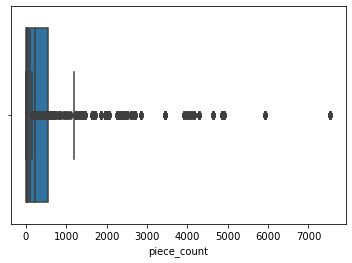

In [31]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.boxplot(lego['ages']) #No apprent outliers in the dataset
sns.boxplot(lego['list_price']) #No apprent outliers in the dataset
sns.boxplot(lego['piece_count']) #Maximum piece count of 7541 is worrying

# 3. Data Analysis in accordance to business objectives

# 3.1.A What price should be set for the Lego sets with 8,000 Lego pieces?

## Answer: 792

In [32]:
#Here we define in the independant and dependant variable
y = lego["list_price"].values.reshape(-1,1)
x = lego["piece_count"].values.reshape(-1,1)

In [33]:
#We then fit the model to confirm that the linear regression has been generated
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [34]:
#We use the predict method to begin the prediction
lm.predict(x)

array([[44.16935263],
       [33.6057859 ],
       [24.49592101],
       ...,
       [39.90516056],
       [21.97617115],
       [27.88789198]])

In [35]:
#We aim to understand where the intercept is located
lm.intercept_

array([17.32432525])

In [36]:
#We now need to confirm the relationship between the variables
lm.coef_

array([[0.09691346]])

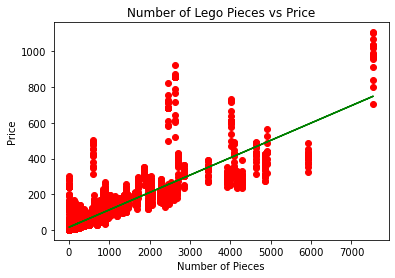

In [37]:
#We then plot the relationship between x and y
# [1] Create a scatterplot (with red data points). 
plt.scatter(x, y, color = "red")  
# [2] Create a regression line in green.
plt.plot(x, lm.predict(x), color = "green") 
# [3] Set the title for the graph.
plt.title("Number of Lego Pieces vs Price") 
# [4] Set the label for the x-axis.
plt.xlabel("Number of Pieces") 
# [5] Set the label for the y-axis.
plt.ylabel("Price")
# [6] Print the graph. 
plt.show() 

In [38]:
#We now make the prediction for what price should be set for the number of pieces
predict_price_of_pieces = lm.predict([[8000],[9000],[10000]])

#See the result
print(predict_price_of_pieces)

[[792.6319753 ]
 [889.54543155]
 [986.45888781]]


In [39]:
#Now that we have the prediction we are going to test the model
#Import the sklearn module
from sklearn.model_selection import train_test_split

# We will split the data 50/50
# in values between variable.
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5, 
                                                 random_state=100) 

In [40]:
#Run the regression test and visualise the training data once more
#Linear regression: fitting model
lm.fit(x_train, y_train)

LinearRegression()

In [41]:
#Now we will predict the values in the training data set 
y_pred = lm.predict(x_train)

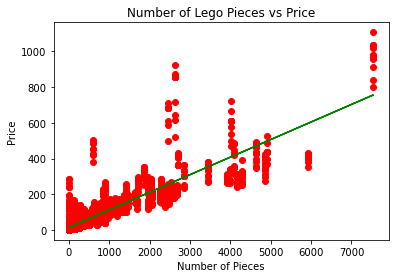

In [42]:
#We visualise the data
# [1] Create a scatterplot (with red data points).
plt.scatter(x_train, y_train, color = "red")  
# [2] Create a regression line in green.
plt.plot(x_train, y_pred, color = "green")
# [3] Set the title for the graph.  
plt.title("Number of Lego Pieces vs Price")
# [4] Set the label for the x-axis.  
plt.xlabel("Number of Pieces")
# [5] Set the label for the y-axis.   
plt.ylabel("Price") 
# [6] Print the graph. 
plt.show()

In [43]:
#We now test how well the model is doing using the R squared value
print(lm.score(x_train, y_train))

0.7705133058598679


In [44]:
#This value of greater than 0.7 shows there is a strong correlation between price and pieces. 
#But we could do better with a higher r squared value.

# 3.1.B  What price should be set for the Lego sets with 8,000 Lego pieces that are most likely to be purchased by 30-year-old customers?

# Answer 793

In [45]:
# Define the variables and assign both the age, price and piece count
y = lego["list_price"]
x = lego[["piece_count","ages"]]

In [46]:
#Run the linear regression model
mlr = linear_model.LinearRegression()
mlr.fit(x,y)
mlr.predict(x)

array([44.23451228, 33.66784552, 24.5553072 , ..., 40.09246503,
       22.06566694, 27.97912265])

In [47]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", mlr.score(x,y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

R-squared:  0.7562637453438303
Intercept:  16.795474803050418
Coefficients:


[('piece_count', 0.09694189692265547), ('ages', 0.030849054183007322)]

In [48]:
# Estimate some predictions and print the predicted value
New_Value1 = 8000
New_Value2 = 30
print ('Predicted Value: \n', mlr.predict([[New_Value1 ,New_Value2]]))  

Predicted Value: 
 [793.25612181]


In [55]:
# Create train and test data sets with a 70/30 split
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,train_size=0.30, random_state=100) 

In [56]:
#Train and testing subsets with MLR and summarise with a OLS Regression table
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_test))
print_model = model.summary()
print(print_model)
import warnings
warnings.filterwarnings("ignore")

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     6652.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:50:37   Log-Likelihood:                -19221.
No. Observations:                3678   AIC:                         3.845e+04
Df Residuals:                    3675   BIC:                         3.847e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.9089      1.774      7.839      

In [57]:
#Run a prediction
mlr = LinearRegression()
mlr.fit(x_test, y_test)
y_pred_mlr = mlr.predict(x_test)
print("The Prediction for the test set: {}".format(y_pred_mlr))

The Prediction for the test set: [23.93299591 30.69685671 53.63290322 ... 47.24954335 32.05371016
 27.58850079]


In [58]:
#Overall % confidence of the model
print(mlr.score(x_train,y_train)*100)

78.26613082996747


In [59]:
#Test for multicollinearity
x_temp = sm.add_constant(x_train)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values,i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(2))

   VIF Factor     features
0        5.71        const
1        1.01  piece_count
2        1.01         ages


In [60]:
#Overall we have low multicollinearity within our dataset as showm by the VIF factor.